/var/folders/7c/4zm_3jg574542gx6m1rcrwwc0000gn/T/ipykernel_1709/2337681387.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2024-10-31", end="2025-10-31")
[*********************100%***********************]  1 of 1 completed


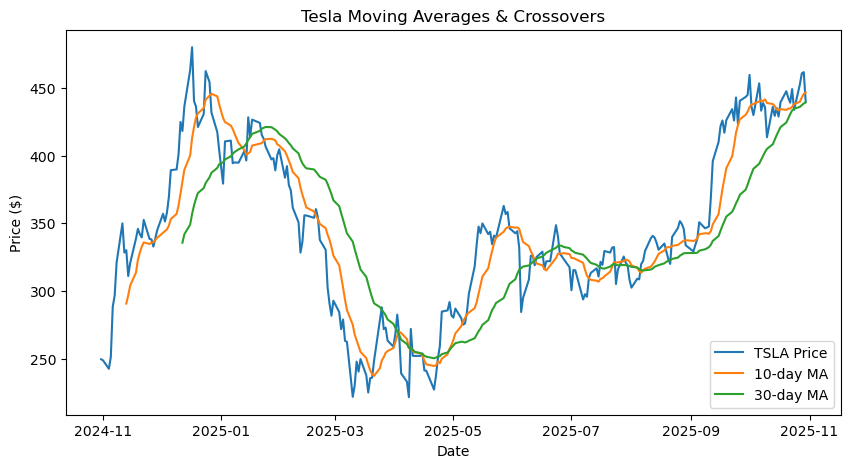

<Figure size 1000x500 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

ticker = "TSLA"     
data = yf.download(ticker, start="2024-10-31", end="2025-10-31")

data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()

data['Signal'] = 0
data.loc[data['MA10'] > data['MA30'], 'Signal'] = 1   
data.loc[data['MA10'] < data['MA30'], 'Signal'] = -1   
data['Position'] = data['Signal'].shift(1)             

plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='TSLA Price')
plt.plot(data['MA10'], label='10-day MA')
plt.plot(data['MA30'], label='30-day MA')
plt.legend()
plt.title('Tesla Moving Averages & Crossovers')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.figure(figsize=(10,5))
plt.show()

In [4]:
short_ma = float(data['MA10'].iloc[-1])
long_ma = float(data['MA30'].iloc[-1])
price = float(data['Close'].iloc[-1])
print(f"Price: ${price:.2f}")
print(f"10-day MA: ${short_ma:.2f}")
print(f"30-day MA: ${long_ma:.2f}")
print("Signal:", "Call" if short_ma > long_ma else "Put")


Price: $440.10
10-day MA: $446.56
30-day MA: $439.15
Signal: Call


/var/folders/7c/4zm_3jg574542gx6m1rcrwwc0000gn/T/ipykernel_4613/782474902.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(data['Close'].iloc[-1])
